Dropping these non-predictive text columns: ['Name']

Feature types after processing:
Year               int64
Age                int64
Gender             int32
Race               int32
Region             int32
State              int32
Registered         int32
Economic Status    int32
dtype: object

Random Forest (Training)
Accuracy: 0.9994
Precision: 0.9984
Recall: 0.9991
------------------------------

Random Forest (Testing)
Accuracy: 0.7536
Precision: 0.4978
Recall: 0.4775
------------------------------

SVM (Training)
Accuracy: 0.7528
Precision: 0.5076
Recall: 0.5214
------------------------------

SVM (Testing)
Accuracy: 0.7569
Precision: 0.5045
Recall: 0.5270
------------------------------


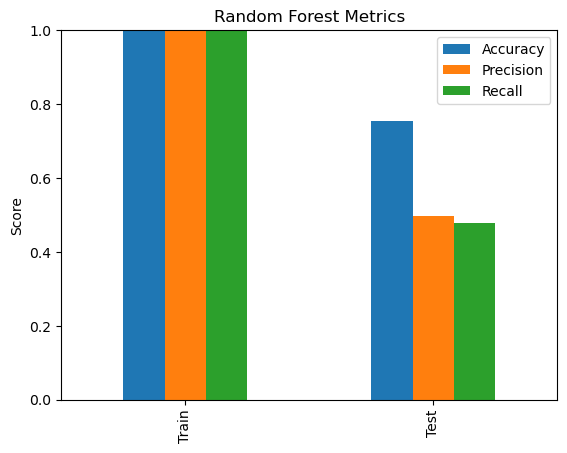

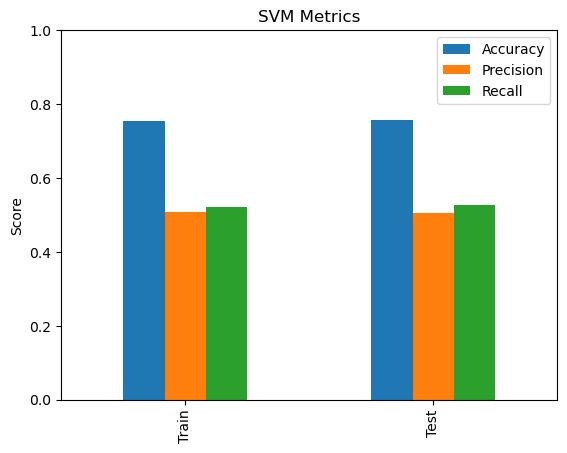

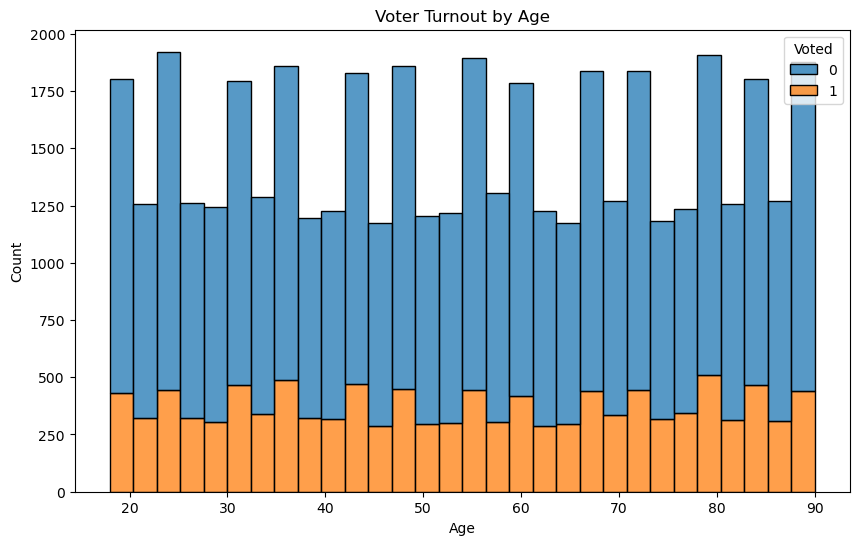

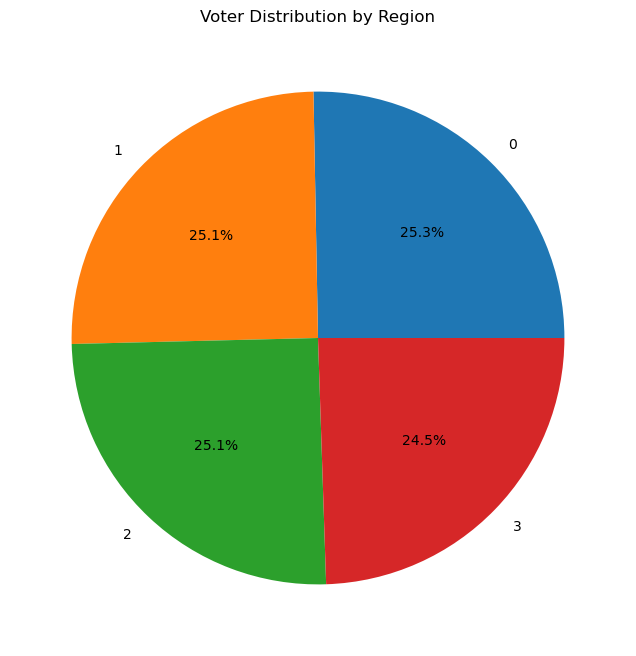

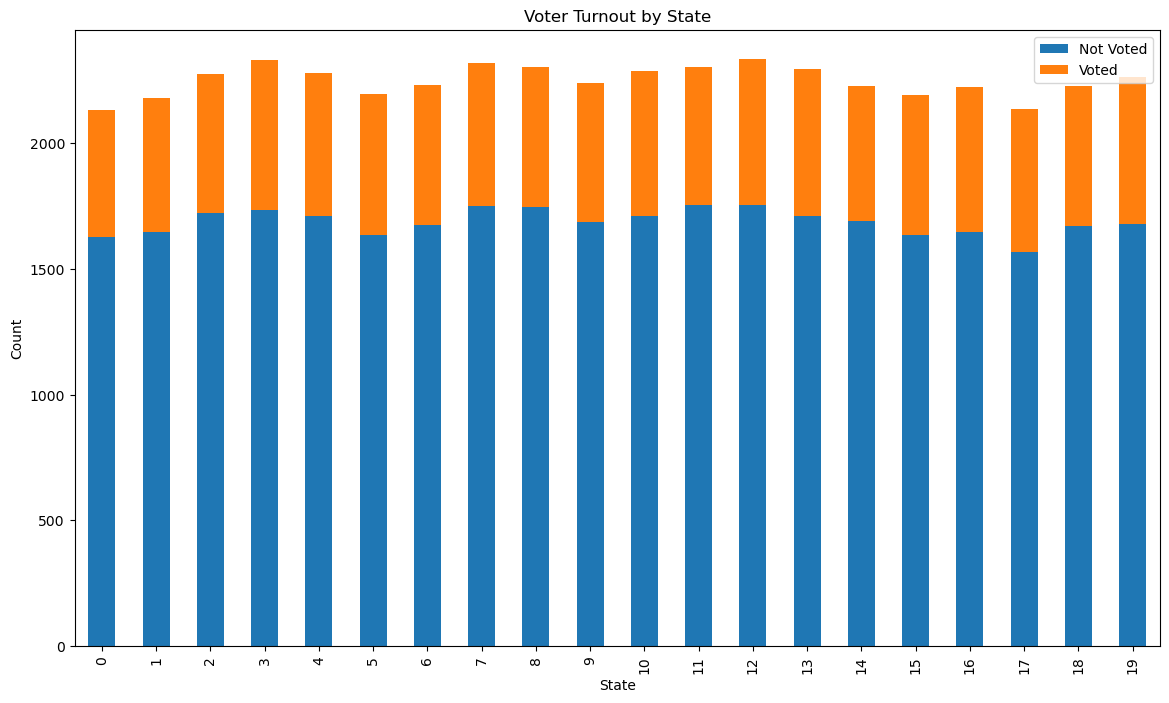

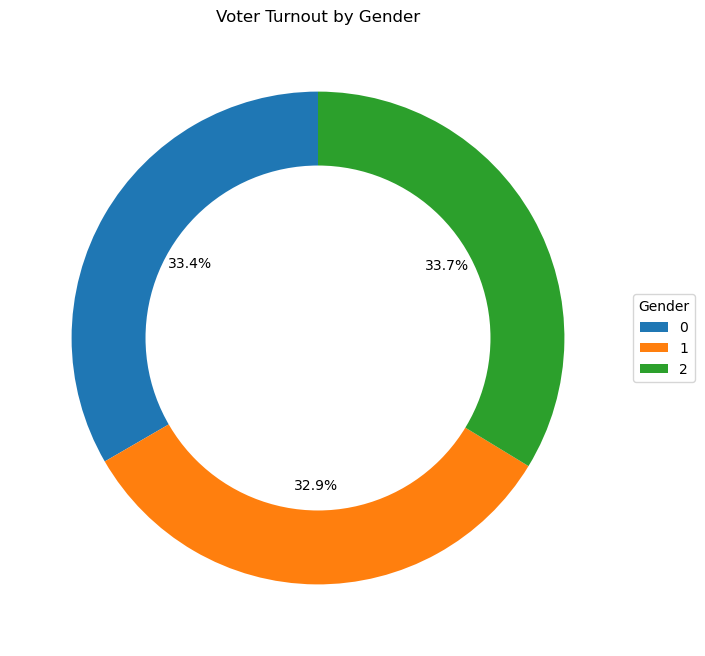

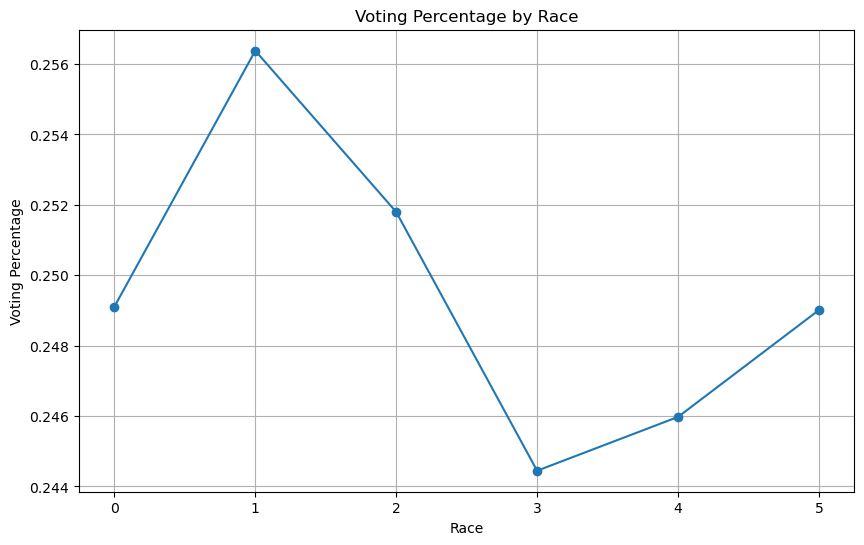

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r'C:\Users\kalya\Desktop\6th Sem\Machine Learning\ASSIGNMENT\us_voter_registration_1976_2020.csv')
# ------------------- Data Cleaning -------------------
# 1. Automatically drop irrelevant "text-heavy" columns
non_numeric_cols = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        unique_values = df[col].nunique()
        if unique_values > 50:  # Threshold: adjust if needed
            non_numeric_cols.append(col)

print(f"Dropping these non-predictive text columns: {non_numeric_cols}")
df = df.drop(columns=non_numeric_cols)

# 2. Encode remaining categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = le.fit_transform(df[col].astype(str))

# 3. Drop missing values
df = df.dropna()

# 4. Define Features and Target
X = df.drop('Voted', axis=1)
y = df['Voted']

# 5. Confirm feature types
print("\nFeature types after processing:")
print(X.dtypes)

# ------------------- Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------- Model Training -------------------
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True)

# Fit models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# ------------------- Predictions -------------------
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)
y_pred_svm_train = svm_model.predict(X_train)
y_pred_svm_test = svm_model.predict(X_test)

# ------------------- Evaluation -------------------
def evaluate_model(y_true, y_pred, model_name, dataset_type):
    print(f"\n{model_name} ({dataset_type})")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print("-" * 30)

# Random Forest Evaluation

evaluate_model(y_train, y_pred_rf_train, "Random Forest", "Training")
evaluate_model(y_test, y_pred_rf_test, "Random Forest", "Testing")

# SVM Evaluation
evaluate_model(y_train, y_pred_svm_train, "SVM", "Training")
evaluate_model(y_test, y_pred_svm_test, "SVM", "Testing")

# Prepare metrics for visualization
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred)
    }

rf_train_metrics = get_metrics(y_train, y_pred_rf_train)
rf_test_metrics = get_metrics(y_test, y_pred_rf_test)
svm_train_metrics = get_metrics(y_train, y_pred_svm_train)
svm_test_metrics = get_metrics(y_test, y_pred_svm_test)

# ------------------- Metrics Visualization -------------------
def plot_metrics(metrics_dict, title):
    df_metrics = pd.DataFrame(metrics_dict).T
    df_metrics.plot(kind='bar')
    plt.title(title)
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.show()

# Plot Random Forest Metrics
plot_metrics({'Train': rf_train_metrics, 'Test': rf_test_metrics}, 'Random Forest Metrics')

# Plot SVM Metrics
plot_metrics({'Train': svm_train_metrics, 'Test': svm_test_metrics}, 'SVM Metrics')

# ------------------- Additional Visualizations -------------------
# 1. Histogram: Age vs Voted
if 'Age' in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='Age', hue='Voted', multiple='stack', bins=30)
    plt.title('Voter Turnout by Age')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

# 2. Pie Chart: Region vs Voted
if 'Region' in df.columns:
    region_voted = df.groupby('Region')['Voted'].value_counts().unstack().fillna(0)
    region_voted.sum(axis=1).plot.pie(autopct='%1.1f%%', figsize=(8,8))
    plt.title('Voter Distribution by Region')
    plt.ylabel('')
    plt.show()

# 3. Pyramid Chart: Economic Status vs Voted
if 'EconomicStatus' in df.columns:
    econ_status = df.groupby(['EconomicStatus', 'Voted']).size().unstack().fillna(0)
    econ_status = econ_status.sort_index()

    plt.figure(figsize=(10,7))
    plt.barh(econ_status.index, econ_status[0], color='red', label='Not Voted')
    plt.barh(econ_status.index, econ_status[1], left=econ_status[0], color='green', label='Voted')
    plt.xlabel('Number of People')
    plt.title('Voter Turnout by Economic Status')
    plt.legend()
    plt.show()

# 4. Bar Chart: State vs Voted
if 'State' in df.columns:
    state_voted = df.groupby('State')['Voted'].value_counts().unstack().fillna(0)
    state_voted.plot(kind='bar', stacked=True, figsize=(14,8))
    plt.title('Voter Turnout by State')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.legend(['Not Voted', 'Voted'])
    plt.show()

# 5. Donut Chart: Gender vs Voted
if 'Gender' in df.columns:
    gender_voted = df.groupby('Gender')['Voted'].value_counts().unstack().fillna(0)
    gender_voted_total = gender_voted.sum(axis=1)

    fig, ax = plt.subplots(figsize=(8,8))
    wedges, texts, autotexts = ax.pie(gender_voted_total, autopct='%1.1f%%', startangle=90)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    plt.title('Voter Turnout by Gender')
    plt.legend(gender_voted.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

# 6. Line Graph: Race vs Voted
if 'Race' in df.columns:
    race_voted = df.groupby('Race')['Voted'].mean()
    race_voted.plot(kind='line', marker='o', figsize=(10,6))
    plt.title('Voting Percentage by Race')
    plt.xlabel('Race')
    plt.ylabel('Voting Percentage')
    plt.grid(True)
    plt.show()
